In [1]:
!pip install tensorflow==2.5.1 tensorflow-gpu==2.5.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic= mp.solutions.holistic # Holistic Model
mp_drawing=mp.solutions.drawing_utils  #drawing utilities

In [4]:
def mediapipe_detection(image,model):
    image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)       # color conversion
    image.flags.writeable=False             # image is no longer writable
    results=model.process(image)           # make prediction
    image.flags.writeable=True            # image is writable
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR) # color conversion
    return image,results

In [5]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))
                              
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,255,255),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))
    
    
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(0,0,0),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))
    
    
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))

In [6]:
cap=cv2.VideoCapture(0)
# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5)as holistic:
    while cap.isOpened():
        # read Feed
        ret,frame=cap.read()
        #make detections
        image,results=mediapipe_detection(frame,holistic)
        
        #Draw landmarks
        draw_landmarks(image,results)
        
        # show to screen
        cv2.imshow('OpenCV Feed', image)
        # break
        if cv2.waitKey(10)& 0xFF==ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [7]:
draw_landmarks(frame,results)

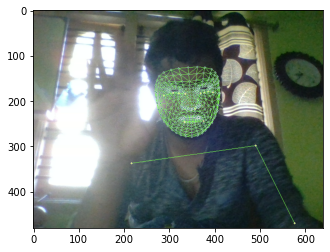

In [8]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [9]:
results.face_landmarks

landmark {
  x: 0.54476464
  y: 0.48471868
  z: -0.02243423
}
landmark {
  x: 0.546123
  y: 0.44949102
  z: -0.05141445
}
landmark {
  x: 0.54466957
  y: 0.4584467
  z: -0.0246659
}
landmark {
  x: 0.53488207
  y: 0.4059853
  z: -0.04268411
}
landmark {
  x: 0.545806
  y: 0.43682665
  z: -0.055741332
}
landmark {
  x: 0.54472136
  y: 0.4188386
  z: -0.053293776
}
landmark {
  x: 0.54139054
  y: 0.37458205
  z: -0.031528134
}
landmark {
  x: 0.46843264
  y: 0.373594
  z: 0.0028486876
}
landmark {
  x: 0.5397019
  y: 0.3441374
  z: -0.028189097
}
landmark {
  x: 0.53910756
  y: 0.32754987
  z: -0.03202439
}
landmark {
  x: 0.534911
  y: 0.26335663
  z: -0.027876634
}
landmark {
  x: 0.5447819
  y: 0.49051178
  z: -0.020585807
}
landmark {
  x: 0.5447125
  y: 0.49477726
  z: -0.016890103
}
landmark {
  x: 0.5445713
  y: 0.49627244
  z: -0.0121657625
}
landmark {
  x: 0.5447932
  y: 0.50087273
  z: -0.009295995
}
landmark {
  x: 0.5450843
  y: 0.50654066
  z: -0.010426806
}
landmark {
  x:

In [10]:
pose=[]
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test

array([ 0.55834687,  0.45226064, -0.95978224, ...,  0.        ,
        0.        ,  0.        ])

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.55834687,  0.45226064, -0.95978224, ...,  0.        ,
        0.        ,  0.        ])

# Folder 

In [18]:

DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [19]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass
        
        

In [20]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [21]:
cap.release()
cv2.destroyAllWindows()

In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [25]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

FileNotFoundError: [Errno 2] No such file or directory: 'MP_Data\\hello\\3\\15.npy'

In [ ]:
np.array(sequences).shape

In [ ]:
np.array(labels).shape

In [ ]:
X = np.array(sequences)

In [ ]:
X.shape

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [ ]:
y_test.shap

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
res = [.7, 0.2, 0.1]

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:

model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

In [ ]:
model.summary()

In [ ]:
res = model.predict(X_test)

In [ ]:
actions[np.argmax(res[4])]

In [ ]:
actions[np.argmax(y_test[4])]

In [ ]:
model.save('action.h5')

In [ ]:
del model

In [ ]:
model.load_weights('action.h5')